In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/Toddler Autism dataset July 2018 (1).csv")
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
data.isna().sum()

,0
Case_No,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [ ]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data=data.drop("Case_No",axis=1)

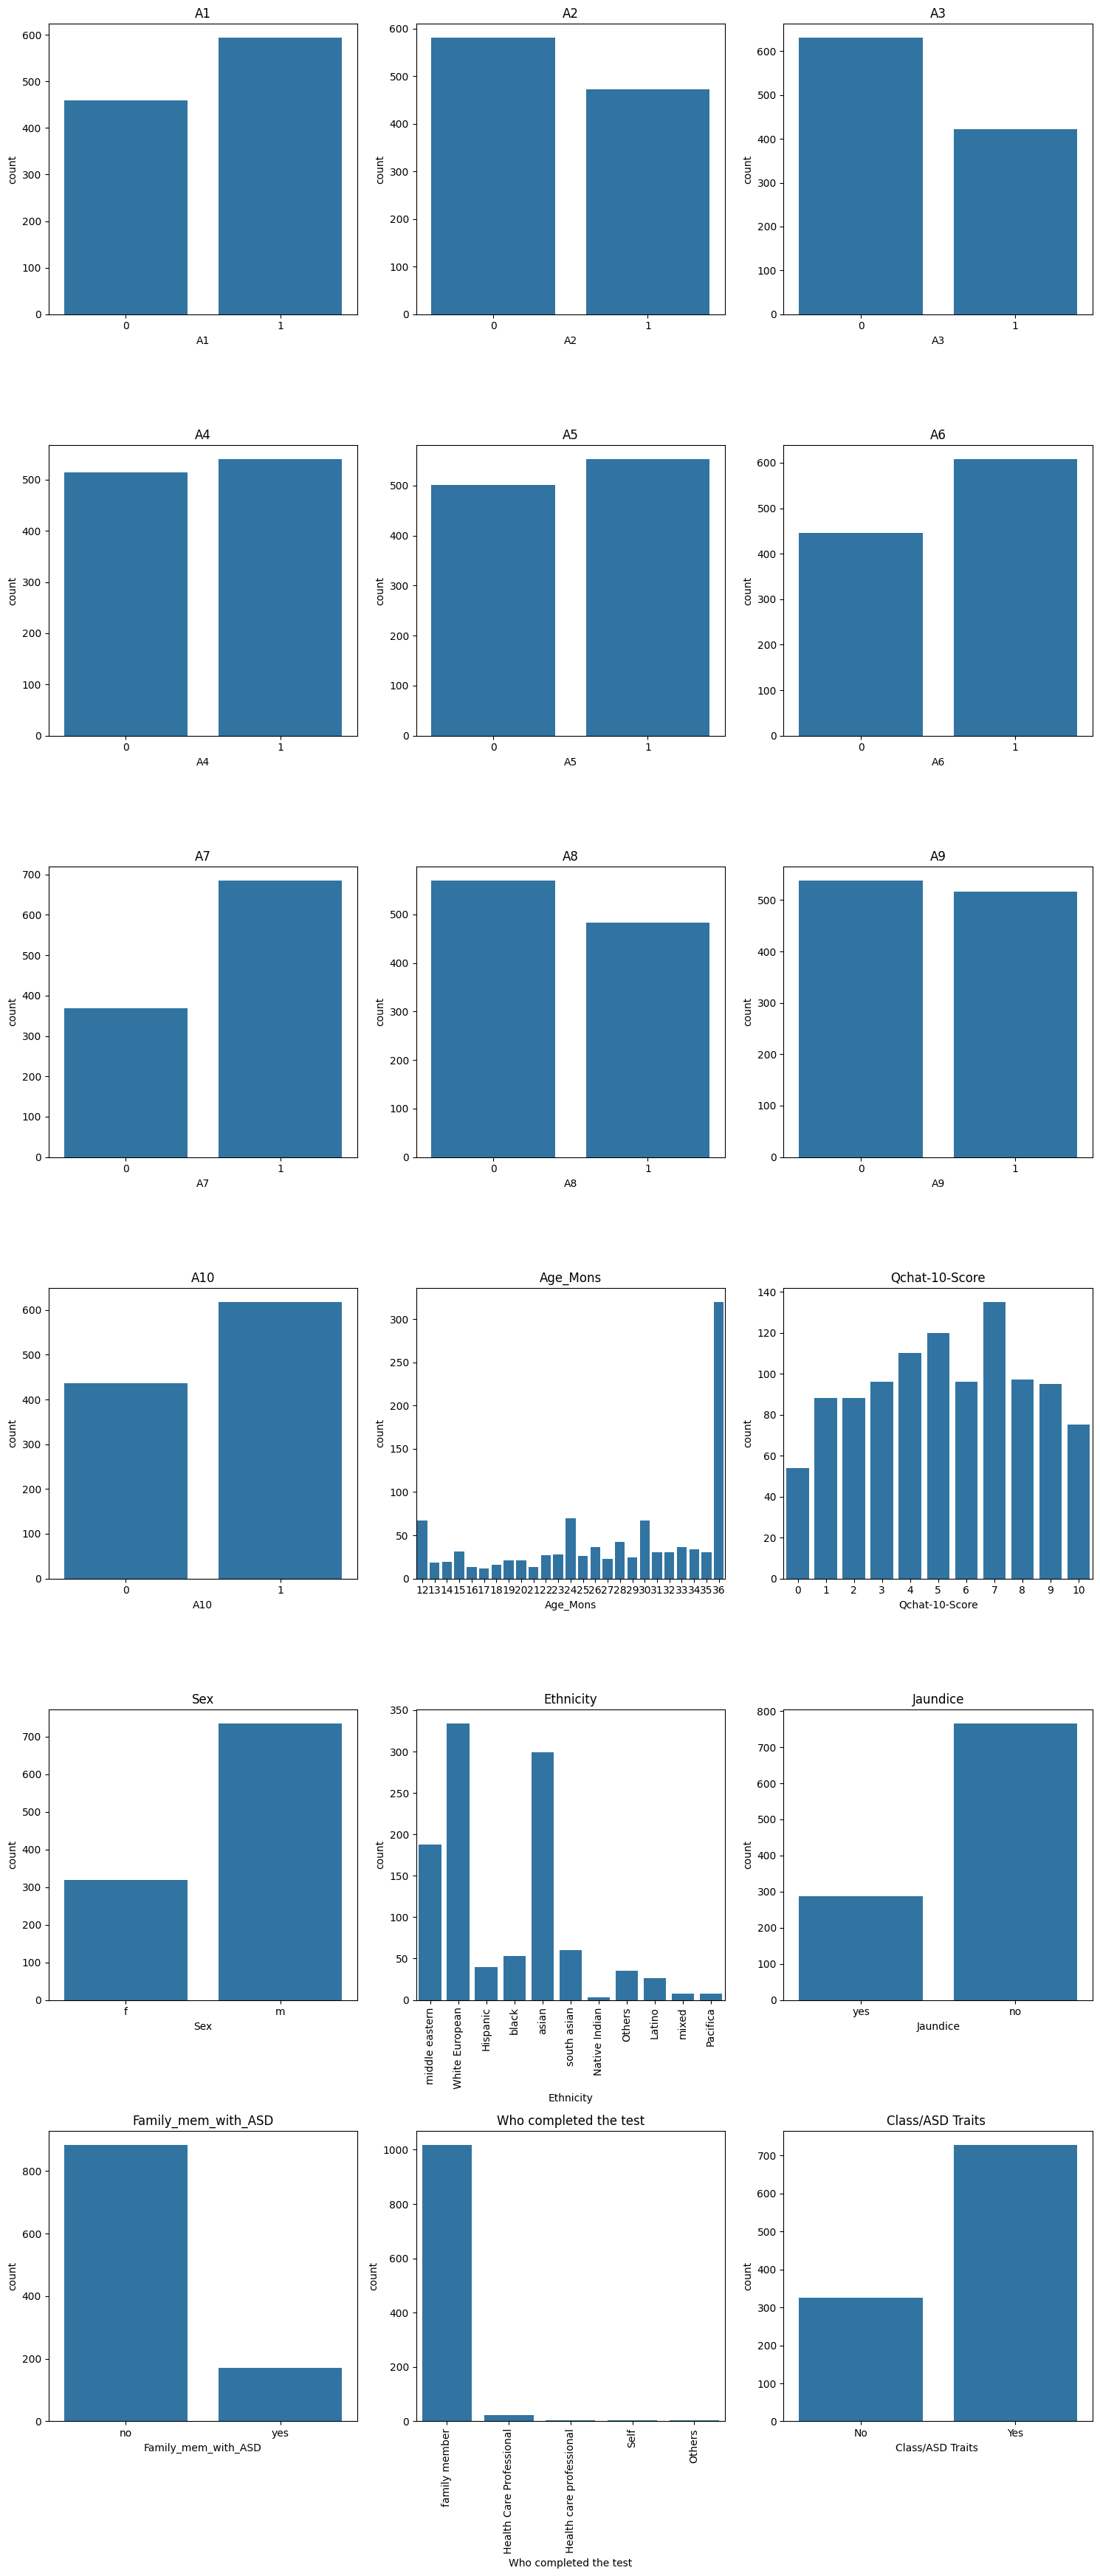

In [ ]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

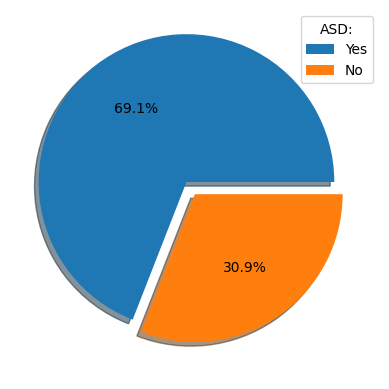

In [ ]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

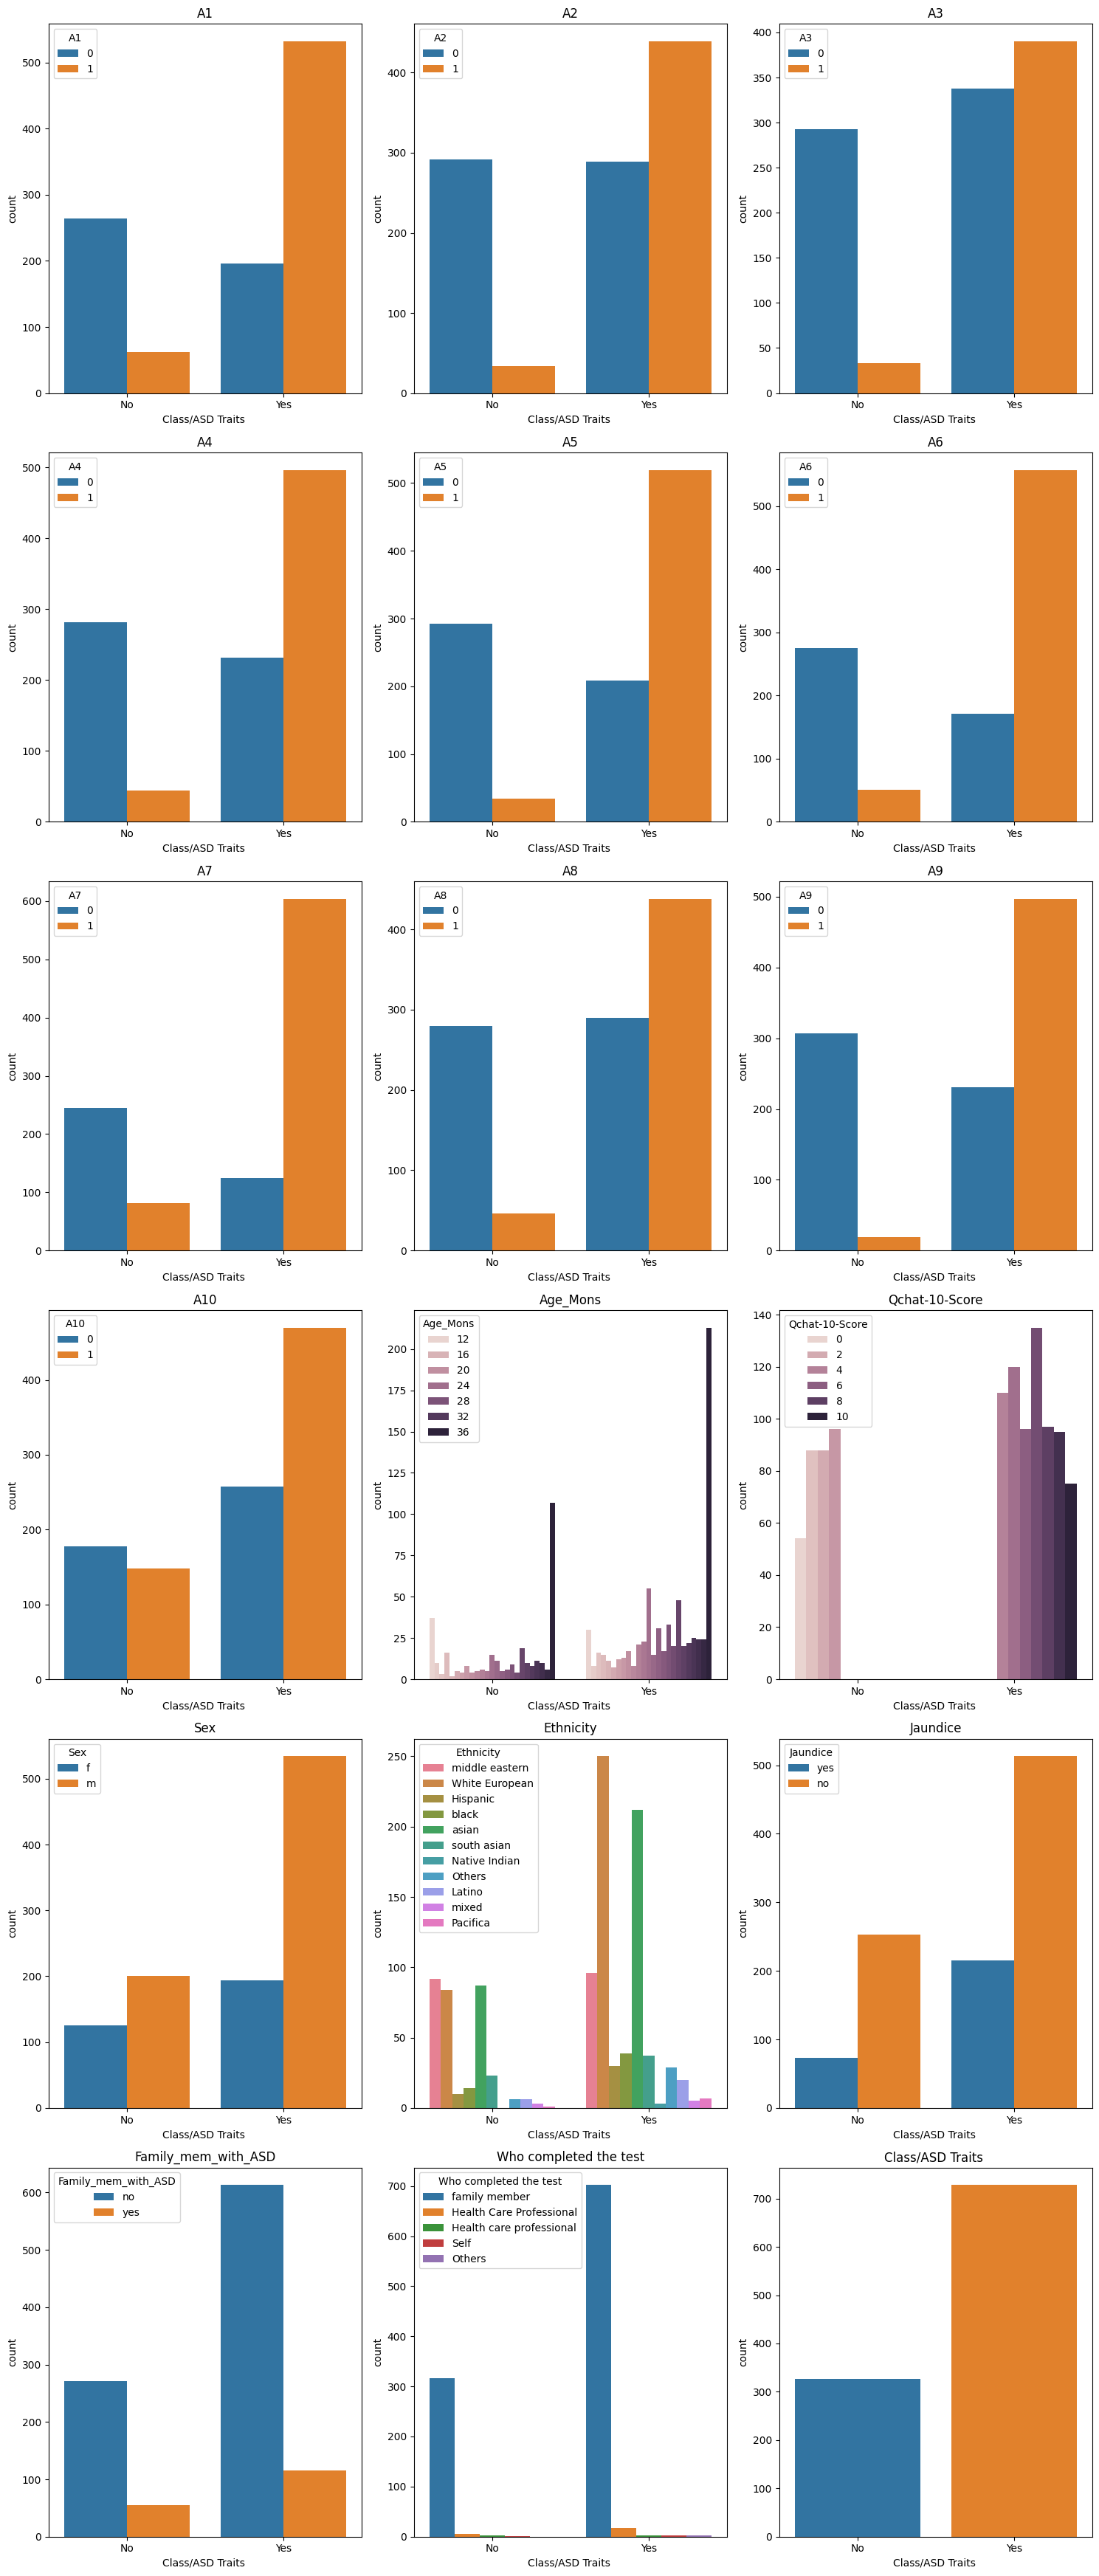

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(x=data["Class/ASD Traits "], hue=data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
data.groupby('Ethnicity').size()

,0
Ethnicity,
Hispanic,40
Latino,26
Native Indian,3
Others,35
Pacifica,8
White European,334
asian,299
black,53
middle eastern,188


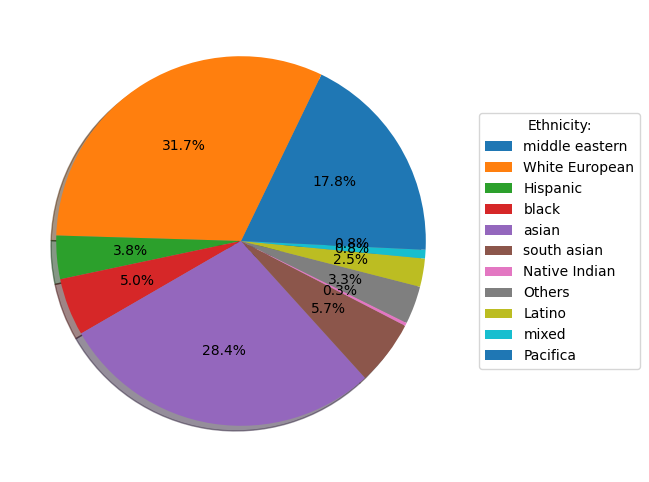

In [ ]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

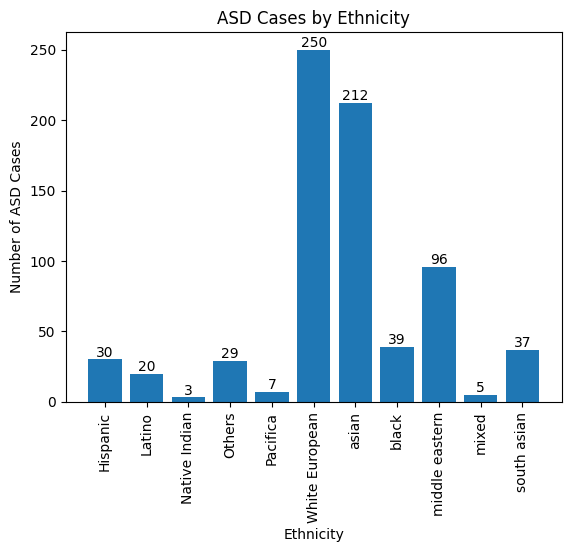

In [ ]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

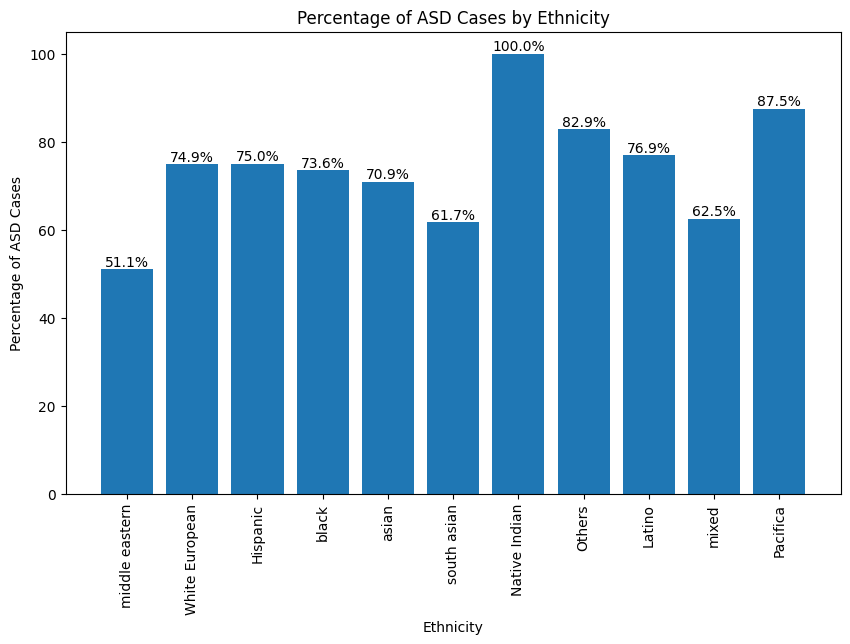

In [ ]:
total_ethnicity_counts = data.groupby('Ethnicity').size()
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
asd_percentage_ethnicity = (asd_counts_ethnicity / total_ethnicity_counts) * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(asd_percentage_ethnicity.reindex(labels).index, asd_percentage_ethnicity.reindex(labels).values)
plt.xlabel('Ethnicity')
plt.ylabel('Percentage of ASD Cases')
plt.title('Percentage of ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center')
plt.show()

In [ ]:
data.groupby('Sex').size()

,0
Sex,
f,319
m,735


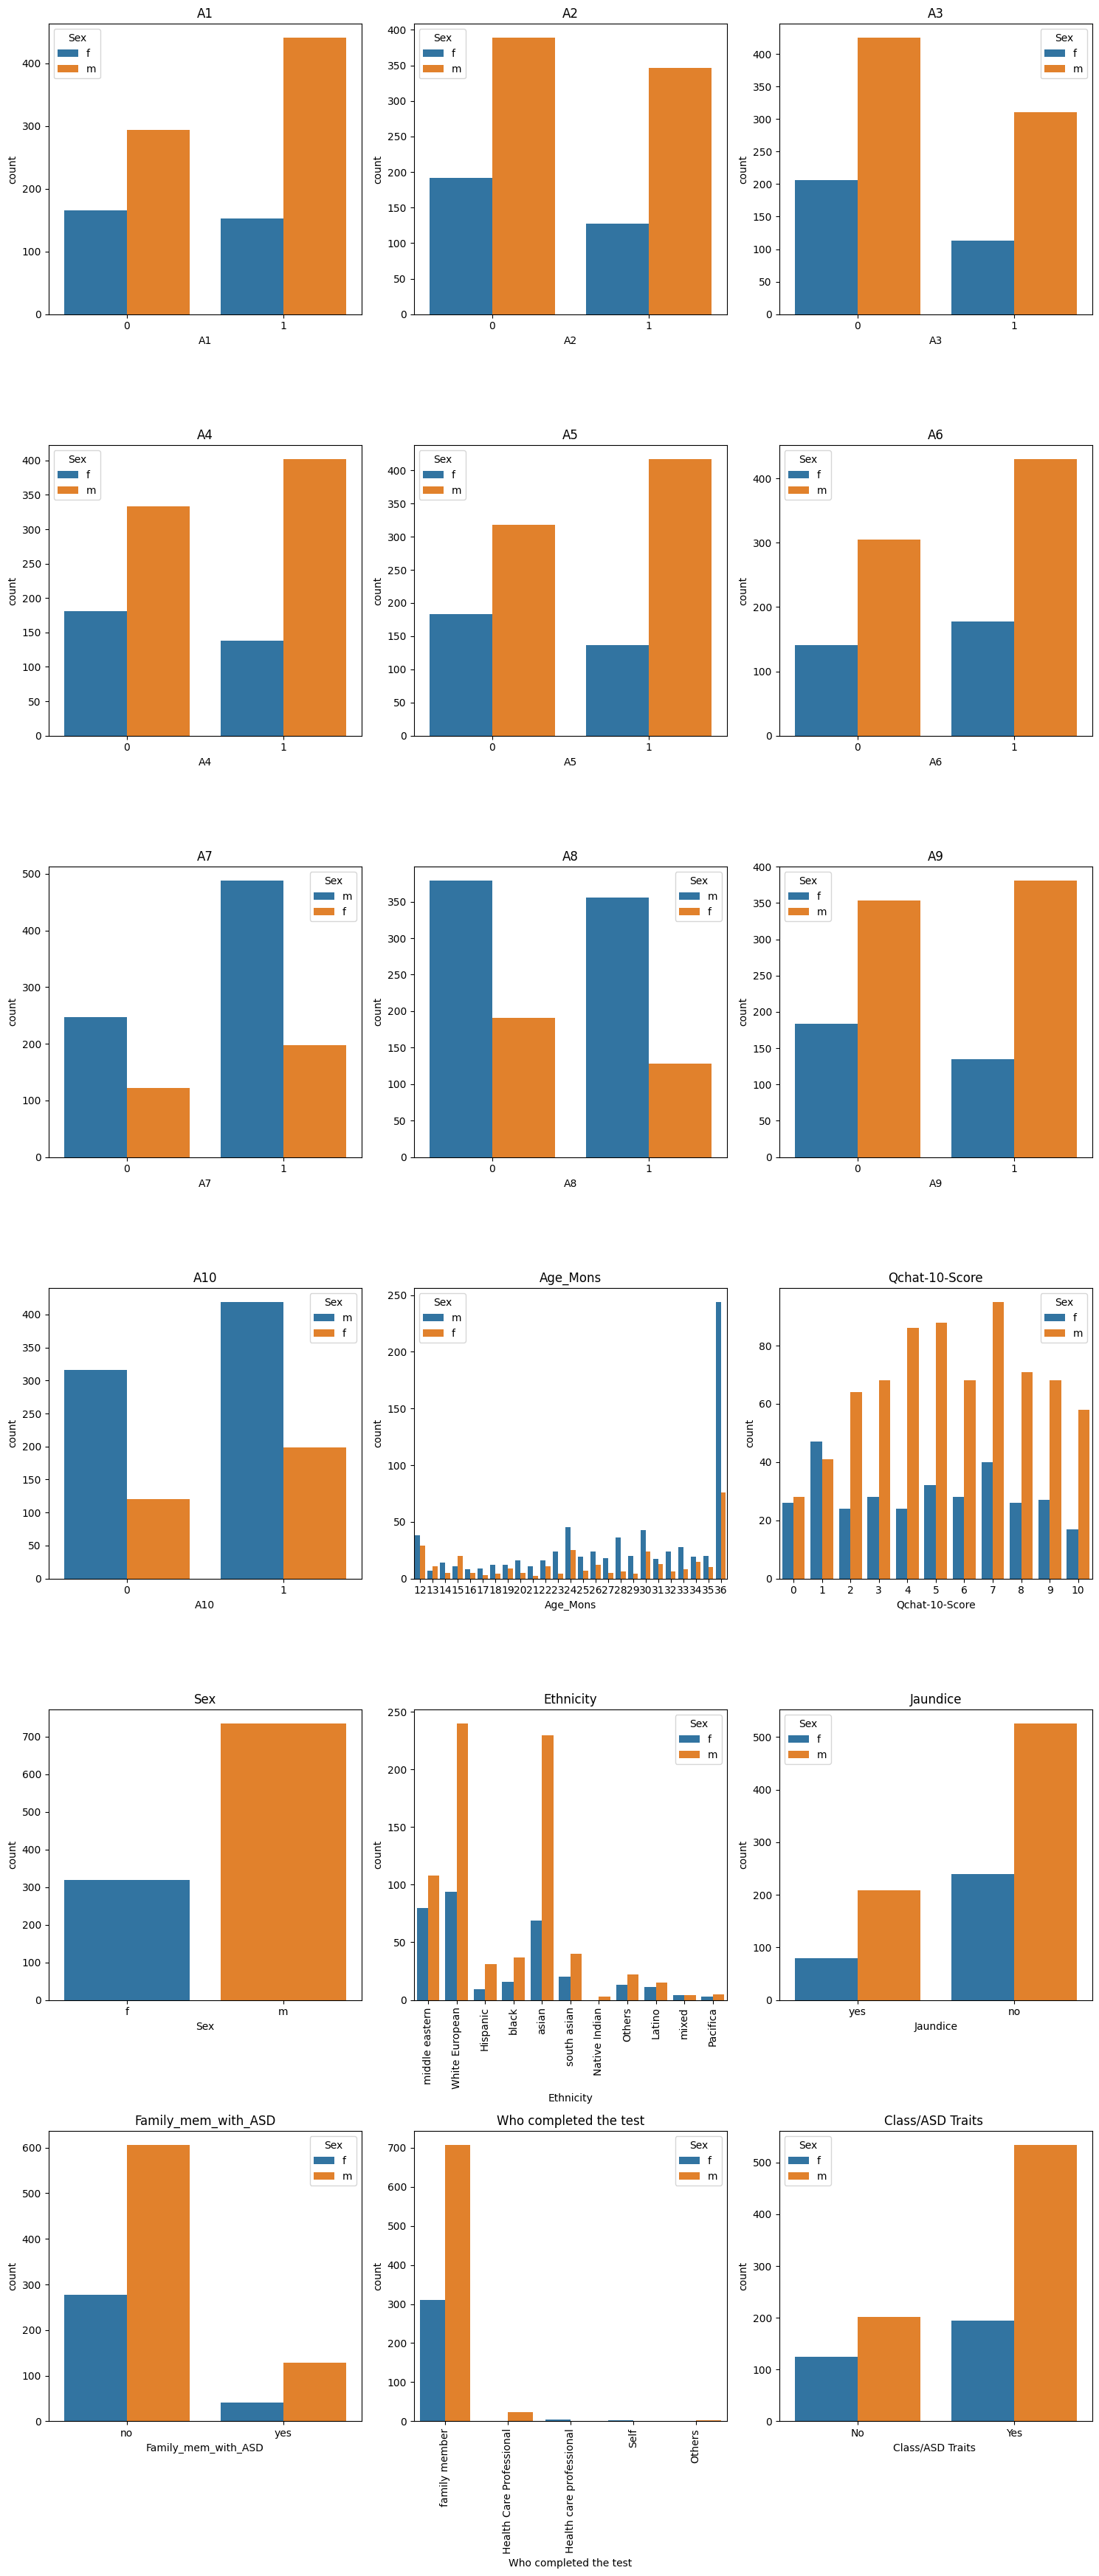

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(data.iloc[:, :]):
    sns.countplot(hue=data["Sex"], x=data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
d1 = pd.read_csv(r"/content/Toddler Autism dataset July 2018 (1).csv")
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
d1["Age_Mons"]=(d1["Age_Mons"]/12).astype(int)
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
d2 = pd.read_csv(r"/content/data_csv.csv")
d2.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [ ]:
d2.isna().sum()

,0
CASE_NO_PATIENT'S,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [ ]:
d2=d2.dropna()

In [ ]:
d2=d2.dropna()

In [ ]:
d3 = pd.read_csv(r"/content/autism_screening.csv")
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
d3.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
d3=d3.dropna()

In [ ]:
d3.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
d3["age"]=(d3["age"]/12).astype(int)
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
print(d1.columns)
print(d2.columns)
print(d3.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')
Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 

In [ ]:
d1=d1.iloc[:,1:]
d2=pd.concat([d2.iloc[:,1:11],d2.iloc[:,[12,13,22,23,24,25,26,27]]],axis=1)
d3=pd.concat([d3.iloc[:,0:11],d3.iloc[:,[17,11,12,13,14,19,20]]],axis=1)

In [ ]:
d1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
d2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [ ]:
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender,ethnicity,jundice,austim,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,6.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,5.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,8.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,6.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,2.0,f,?,no,no,?,NO


In [ ]:
d1.columns = d2.columns
d3.columns = d2.columns

In [ ]:
d1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
d2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,F,middle eastern,Yes,No,Family Member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,M,White European,Yes,No,Family Member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,M,Middle Eastern,Yes,No,Family Member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,M,Hispanic,No,No,Family Member,Yes
4,1,1,0,1,1,1,1,1,1,1,2,9.0,F,White European,No,No,Family Member,Yes


In [ ]:
d3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,2,6.0,f,White-European,no,no,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,5.0,m,Latino,no,yes,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,8.0,m,Latino,yes,yes,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,6.0,f,White-European,no,yes,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,2.0,f,?,no,no,?,NO


In [ ]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[2 3 1]

Qchat_10_Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
['f' 'm']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']

Jaundice
['yes' 'no']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d2.columns:
    print(i)
    print(f"{d2[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  7.  0.  1.]

Sex
['F' 'M']

Ethnicity
['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d3.columns:
    print(i)
    print(f"{d3[i].unique()}\n")

A1
[1 0]

A2
[1 0]

A3
[1 0]

A4
[1 0]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[0 1]

Age_Years
[ 2  3  1  5  4 31]

Qchat_10_Score
[ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]

Sex
['f' 'm']

Ethnicity
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Jaundice
['no' 'yes']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']

ASD_traits
['NO' 'YES']



In [ ]:
data=pd.concat([d1,d2,d3],axis=0)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9.0,f,White European,no,yes,family member,Yes


In [ ]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['f' 'm' 'F' 'M']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Middle Eastern' 'Black' 'Asian' 'South Asian' 'Mixed' 'PaciFica'
 'White-European' '?' 'Middle Eastern ' 'Pasifika' 'Turkish' 'others']

Jaundice
['yes' 'no' 'Yes' 'No']

Family_mem_with_ASD
['no' 'yes' 'No' 'Yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'Family Member' 'Family member' 'School and NGO' 'Parent'
 '?' 'Relative']

ASD_traits
['No' 'Yes' 'NO' 'YES']



In [ ]:
replacements = {
    'f': 'F',
    'm': 'M',
}
data['Sex'] = data['Sex'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Jaundice'] = data['Jaundice'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace(replacements)
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
data['ASD_traits'] = data['ASD_traits'].replace(replacements)

In [ ]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'

}
data['Ethnicity'] = data['Ethnicity'].replace(replacements)

In [ ]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
data['Who_completed_the_test'] = data['Who_completed_the_test'].replace(replacements)

In [ ]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['F' 'M']

Ethnicity
['Middle Eastern' 'White European' 'Hispanic' 'Black' 'Asian'
 'South Asian' 'Native Indian' 'Others' 'Latino' 'Mixed' 'Pacifica'
 'White-European' '?' 'Turkish' 'others']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Others'
 'School and NGO' 'Parent' '?' 'Relative']

ASD_traits
['No' 'Yes']



In [ ]:
X = data.drop("ASD_traits",axis=1)
y = data["ASD_traits"]

In [ ]:
# One Hot Encoding
X=pd.get_dummies(X,columns=["Ethnicity", "Who_completed_the_test"], drop_first=True)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X['Sex']=le.fit_transform(X['Sex'])
X['Jaundice']=le.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD']=le.fit_transform(X['Family_mem_with_ASD'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_val represents your validation set
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data, then transform validation data
scaler.fit(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Assuming you have your data X and y ready
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assuming you have already scaled your data
# X_train_scaled, X_val_scaled, X_test_scaled represent the scaled training, validation, and testing data

# Build the model
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=36))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

# Configure EarlyStopping callback
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)

In [ ]:
# Train the model using training and validation data
history= model.fit(X_train_scaled, y_train, batch_size=20, epochs=100, validation_data=(X_val_scaled, y_val), callbacks=[callback])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8347 - loss: 0.3780 - val_accuracy: 0.9275 - val_loss: 0.1487
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.0900 - val_accuracy: 0.9656 - val_loss: 0.1060
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0568 - val_accuracy: 0.9746 - val_loss: 0.0895
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0451 - val_accuracy: 0.9801 - val_loss: 0.0669
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0339 - val_accuracy: 0.9565 - val_loss: 0.1110
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9921 - loss: 0.0318 - val_accuracy: 0.9674 - val_loss: 0.0761
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accuracy: 0.9801 - val_loss: 0.0520
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.0090 - val_accu

In [ ]:
print(y_test)

[1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 1 0 

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

In [ ]:
y_prob = model.predict(X_test_scaled)
y_pred = np.where(y_prob > 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"{accuracy} , {precision} , {recall} , {f1}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0.9728260869565217 , 0.9691780821917808 , 0.9792387543252595 , 0.9741824440619621


In [ ]:
print(y_pred)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]


In [ ]:
import numpy as np

# Assuming you have a 2D array
#array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Flatten the array using numpy.flatten()
y_pred = y_pred.flatten()


print(y_pred)

[1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 1 0 1 0 

In [ ]:
len(y_test)

552

In [ ]:
len(y_pred)

552

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


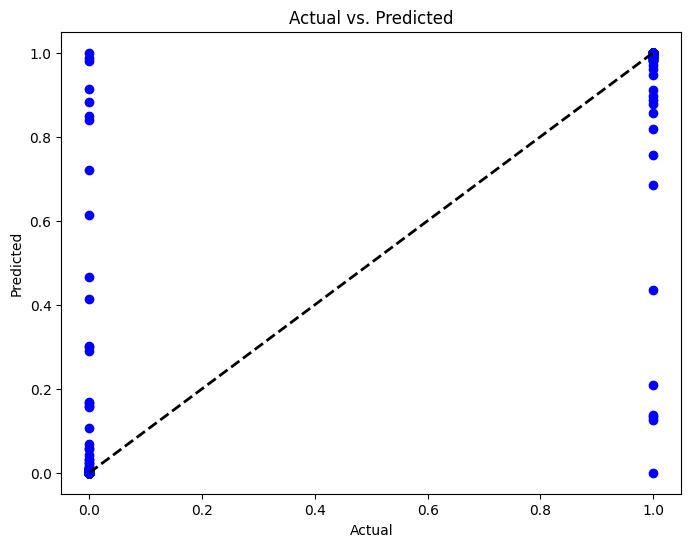

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and loaded your test data into X_test_scaled and y_test

# Predict using the trained model
predictions = model.predict(X_test_scaled)

# Flatten predictions
predictions = predictions.flatten()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


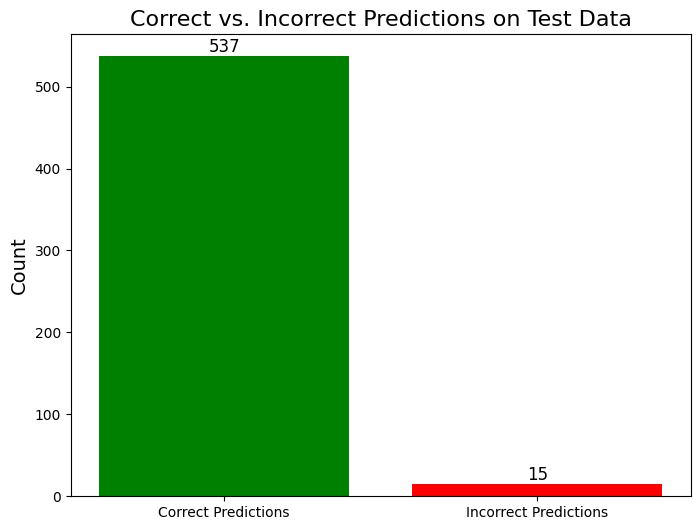

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model and loaded your test data into X_test_scaled and y_test

# Predict using the trained model
predictions = model.predict(X_test_scaled)
binary_predictions = (predictions > 0.5).astype("int32").flatten()

# Count correct and incorrect predictions
correct_predictions = np.sum(binary_predictions == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Plot
labels = ['Correct Predictions', 'Incorrect Predictions']
counts = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.ylabel('Count', fontsize=14)
plt.title('Correct vs. Incorrect Predictions on Test Data', fontsize=16)

# Add text annotations
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1366 
Test Loss: 0.1444767564535141
Test Accuracy: 0.9728260636329651


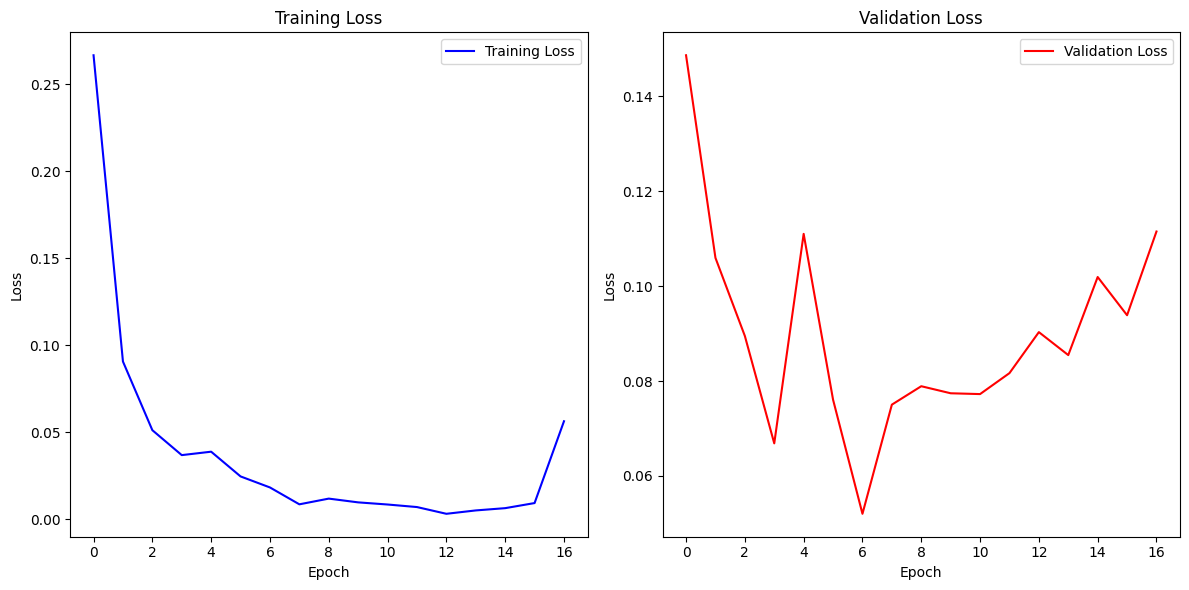

In [ ]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Printing the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plotting training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict probabilities on the test set
y_test_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class predictions based on a threshold (e.g., 0.5)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix for Test Data:
[[254   9]
 [  6 283]]


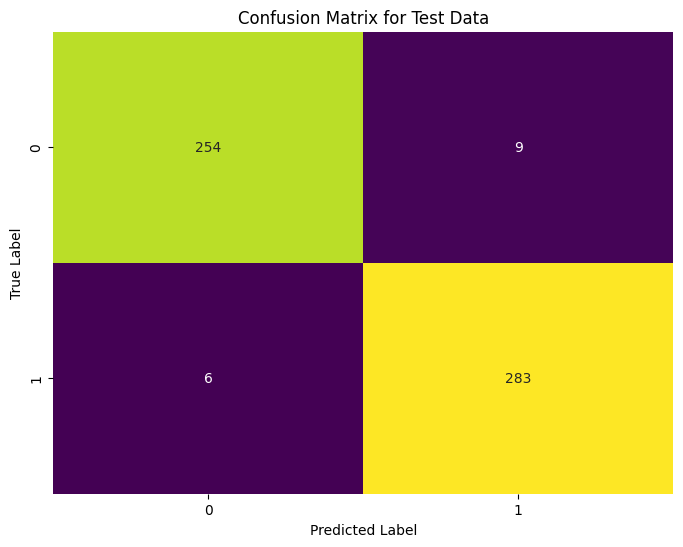

In [ ]:
import seaborn as sns

# Plot confusion matrix with a different color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import pandas as pd



# Create a DataFrame with actual and predicted labels
df = pd.DataFrame({
    "Actual_Label": y_test,  # Assuming y_test contains actual labels
    "Predicted_Label": y_pred # Flatten predictions to match the shape of y_test
})

# Save the DataFrame to an Excel file
df.to_excel(r"/content/Book1.xlsx", index=False)